In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df=pd.read_excel('/content/drive/MyDrive/DS360 Machine Learning/Course DSML/ML/Classification/Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

stdscl=StandardScaler()

def data_splitting(scaling=None):
  X=df.drop("Class", axis=1)
  y=df["Class"]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  if scaling == True:
    X_train=stdscl.fit_transform(X_train)
    X_test=stdscl.transform(X_test)

  return X_train, X_test, y_train, y_test

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def classifiers(classifier, X_train, X_test, y_train, y_test):
  model=classifier.fit(X_train, y_train)
  print(f"Train Score: {model.score(X_train, y_train)}\n")
  prediction=model.predict(X_test)
  print(f"Classification Report: {classification_report(y_test, prediction)}\n")

  sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
  plt.title("Confusion Matrix")
  plt.show()

In [7]:
X_train, X_test, y_train, y_test = data_splitting(scaling=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 7), (180, 7), (720,), (180,))

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [9]:
lr=LogisticRegression(max_iter=500)
svm=SVC(kernel='linear')
dt=DecisionTreeClassifier(criterion='gini')

Train Score: 0.8680555555555556

Classification Report:               precision    recall  f1-score   support

       Besni       0.83      0.87      0.85        86
     Kecimen       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180




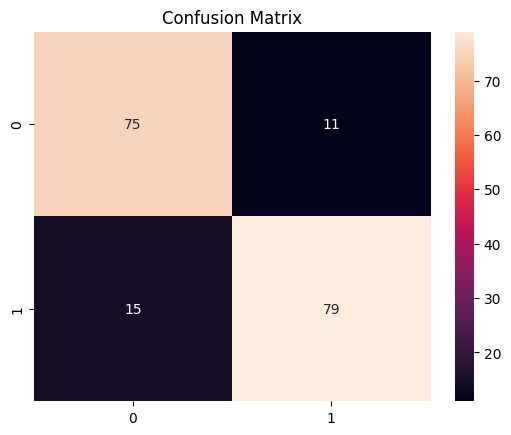

In [10]:
classifiers(lr, X_train, X_test, y_train, y_test)

Train Score: 0.8763888888888889

Classification Report:               precision    recall  f1-score   support

       Besni       0.84      0.87      0.86        86
     Kecimen       0.88      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180




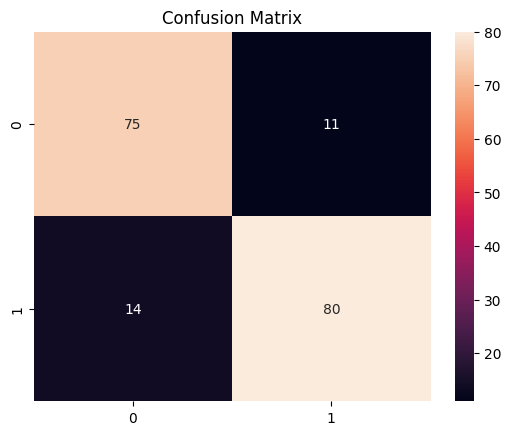

In [11]:
classifiers(svm, X_train, X_test, y_train, y_test)

In [12]:
X_train, X_test, y_train, y_test = data_splitting()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((720, 7), (180, 7), (720,), (180,))

Train Score: 1.0

Classification Report:               precision    recall  f1-score   support

       Besni       0.78      0.79      0.79        86
     Kecimen       0.81      0.80      0.80        94

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180




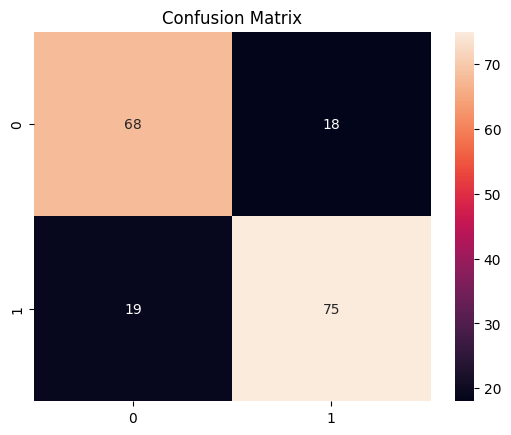

In [13]:
classifiers(dt, X_train, X_test, y_train, y_test)

In [14]:
from sklearn.ensemble import VotingClassifier

In [15]:
voting_clf=VotingClassifier(
    estimators=[('lr', LogisticRegression(max_iter=500)), ('svm1', SVC(kernel='rbf')), ('svm2', SVC(kernel='linear')),
                ('dt1', DecisionTreeClassifier(criterion='gini')), ('dt2', DecisionTreeClassifier(criterion='entropy'))],
    voting='hard'
)

In [16]:
voting_clf.fit(X_train, y_train)
voting_clf.score(X_train, y_train)

0.9138888888888889

In [17]:
pred=voting_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       Besni       0.84      0.88      0.86        86
     Kecimen       0.89      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



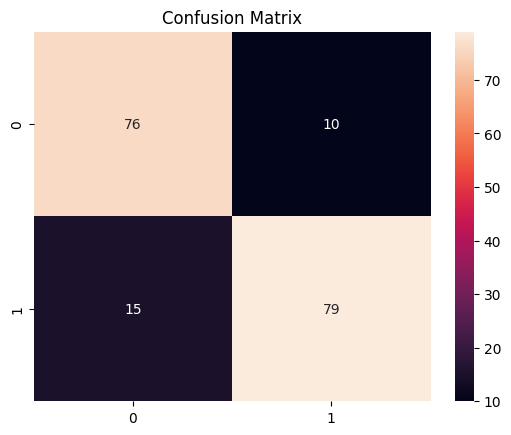

In [18]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.title('Confusion Matrix')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=20)

Train Score: 0.9958333333333333

Classification Report:               precision    recall  f1-score   support

       Besni       0.86      0.85      0.85        86
     Kecimen       0.86      0.87      0.87        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180




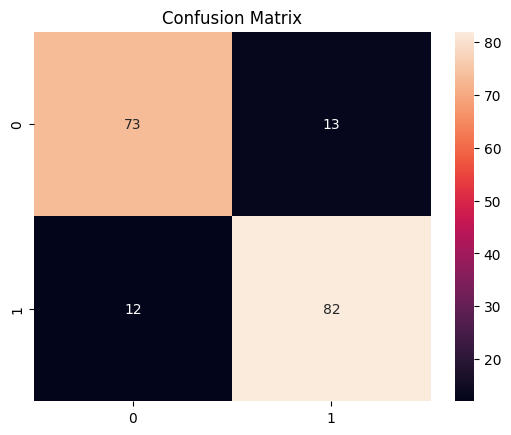

In [20]:
classifiers(rf, X_train, X_test, y_train, y_test)

In [22]:
from xgboost import XGBClassifier

xgb=XGBClassifier()

In [24]:
y_train

,Class
10,Kecimen
334,Kecimen
244,Kecimen
678,Besni
306,Kecimen
...,...
106,Kecimen
270,Kecimen
860,Besni
435,Kecimen


In [25]:
unique_classes = np.unique(np.concatenate((y_train, y_test)))
class_map = {value: idx for idx, value in enumerate(unique_classes)}

# Apply the mapping
y_train_encoded = np.array([class_map[val] for val in y_train])
y_test_encoded = np.array([class_map[val] for val in y_test])

print("Encoded y_train:", y_train_encoded)
print("Encoded y_test:", y_test_encoded)

Encoded y_train: [1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1

Train Score: 0.9986111111111111

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.91      0.87        86
           1       0.91      0.83      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180




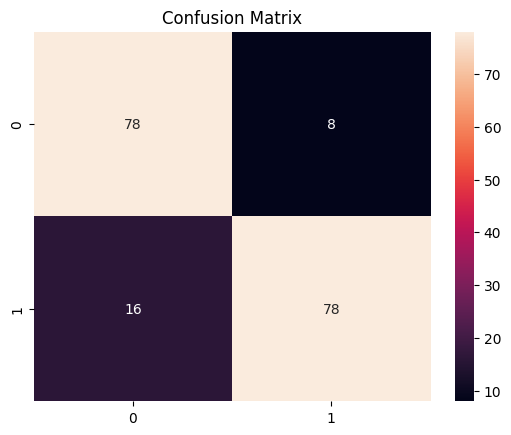

In [26]:
classifiers(xgb, X_train, X_test, y_train_encoded, y_test_encoded)

In [30]:
from lightgbm import LGBMClassifier

lgbm=LGBMClassifier()

[LightGBM] [Info] Number of positive: 356, number of negative: 364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494444 -> initscore=-0.022223
[LightGBM] [Info] Start training from score -0.022223
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

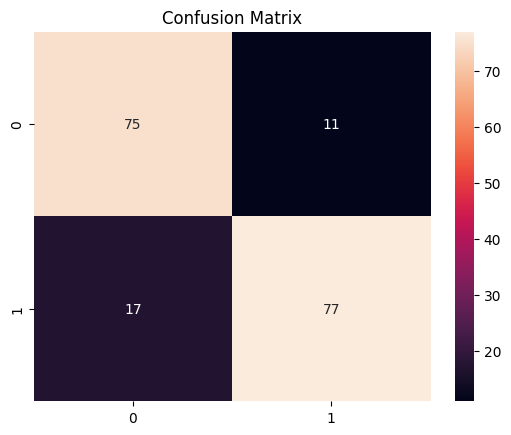

In [31]:
classifiers(lgbm, X_train, X_test, y_train, y_test)